# Proyecto 2 

github: [link aqui](https://github.com/DanielRasho/MD-Proyecto2)

## Imports

In [1]:
# Core Libraries
import random

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

# Machine Learning - Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import (
    confusion_matrix, explained_variance_score, mean_absolute_error, ConfusionMatrixDisplay,
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import (
    GridSearchCV, ShuffleSplit, cross_validate, train_test_split
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Model Evaluation & Utilities
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot

C:\Users\Gerax\AppData\Local\Temp\ipykernel_12968\3907256563.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Cargado de datos

In [2]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Criterios de eliminacion de columnas

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Columas eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

### Posteriormente

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [5]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

Después de obtener un dataset más limpio, el siguiente paso fue analizar su estructura con mayor detalle. Para ello, verificamos la cantidad de filas y columnas restantes, lo que nos permitió entender la dimensión de los datos después del proceso de limpieza.

Además, realizamos una nueva inspección en busca de datos duplicados, junto con los tipos de datos para tener una mejor compresion y asi para evitar cualquier tipo de sesgo.

## KNN

### Hacer la division estratificada

In [6]:
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned["SalePriceCategory"])

C:\Users\Gerax\AppData\Local\Temp\ipykernel_12968\2724778207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
C:\Users\Gerax\AppData\Local\Temp\ipykernel_12968\2724778207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")


## Modelo de Regresion
Se empezára usando un modelo de regresión con KNN . El primer paso para ello es preprocesar los datos categóricos y númericos por separado.

In [7]:
train_salePrice = train_set["SalePrice"]
test_salePrice = test_set["SalePrice"]
x_train = train_set.drop(columns=["SalePriceCategory", "SalePrice"])
x_test = test_set.drop(columns=["SalePriceCategory", "SalePrice"])

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(x_train)
categorical_columns = categorical_columns_selector(x_train)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor,numerical_columns)
    ])

A continuación se define el pipeline de scikit-learn que seguiran los datos: 

In [8]:
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor', KNeighborsRegressor( n_neighbors= int(np.sqrt(x_test.shape[0]))
))])

A continuación se configura el modelo con los datos de entrenamiento, que fueron separados en partes anteriores:

In [9]:
print(train_salePrice.shape)
print(x_train.shape)
modelo = pipeline.fit(x_train, train_salePrice)
y_pred = modelo.predict(x_test)

explained_variance = explained_variance_score(test_salePrice, y_pred)
r2 = r2_score(test_salePrice, y_pred)
mae = mean_absolute_error(test_salePrice, y_pred)
mse = mean_squared_error(test_salePrice, y_pred)
rmse = np.sqrt(mse)

# Store the metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['KNN Regresion'],
    'Explained Variance': [explained_variance],
    'R2': [r2],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

metrics_df

(875,)
(875, 72)


,Model,Explained Variance,R2,MAE,MSE,RMSE
0,KNN Regresion,0.734303,0.724492,23636.695369,2.144475e+09,46308.475422


Los resultados son comparables a los conseguidos por los modelos de regresión ($R^2=0.71$) y de Naive Bayes ($R^2$=0.77) además que en las demás metricas de error también tiene valores similares, esto solo refuerza la idea que hasta ahora el mejor modelo para explicar el precio de las casas son los random forest de regresión. Sin embargo, antes de tener conclusiones se probará una versión de clasificación a continuación.

## Optimizando hiperparametros

Los resultados no fueron prometedores, y son superados por mucho por modelos de regresion lineal o árboles de decisión. Por lo que en un intento para mejorar su rendimiento se usará **validación cruzada conjunto con una variación de hiperparámetros** para encontrar aquellos que minimizan el error cuadrático medio.

In [10]:
params = [{
    'regressor__n_neighbors': range(1, 20),  # Try different neighbor values
    'regressor__weights': ['uniform', 'distance'],  # Distance-based weighting
    'regressor__metric': ['euclidean', 'manhattan']  # Different distance metrics
}]

modelo = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=5, scoring="neg_root_mean_squared_error")
modelo.fit(x_train, train_salePrice)  # Ensure variable names match

y_pred = modelo.predict(x_test)

explained_variance = explained_variance_score(test_salePrice, y_pred)
r2 = r2_score(test_salePrice, y_pred)
mae = mean_absolute_error(test_salePrice, y_pred)
mse = mean_squared_error(test_salePrice, y_pred)
rmse = np.sqrt(mse)

# Store the metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['KNN con CV y optimización de parámetros'],
    'Explained Variance': [explained_variance],
    'R2': [r2],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

metrics_df

,Model,Explained Variance,R2,MAE,MSE,RMSE
0,KNN con CV y optimización de parámetros,0.743499,0.729157,22624.44409,2.108158e+09,45914.681559


In [11]:
modelo.best_params_

{'regressor__metric': 'manhattan',
 'regressor__n_neighbors': 8,
 'regressor__weights': 'distance'}

## Modelo de Clasificación
Para el modelo de clasificacion de KNN, primero neceistamos que construir un pipeline el cual tenga el preprocesador de los datos antes de ingresarlos al modelo, para ello preprocesamos los datos categóricos y númericos por separado.

In [ ]:
train_salePrice = train_set["SalePriceCategory"]
test_salePrice = test_set["SalePriceCategory"]
x_train = train_set.drop(columns=["SalePriceCategory", "SalePrice"])
x_test = test_set.drop(columns=["SalePriceCategory", "SalePrice"])

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(x_train)
categorical_columns = categorical_columns_selector(x_train)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    # ('standar-scaler', numerical_preprocessor,numerical_columns)
])

Posteriormente construimos el pipeline antes menciona sin ningun hiperparamentro debido a que es nuestro primer acercamiento a el modelo y queremos averiguiar que tan eficiente es sin estos hiperparametros.

In [20]:
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor', KNeighborsClassifier()
      )])

Entrenamos al modelo con los datos de entrenamiento

In [21]:
modelo = pipeline.fit(x_train,train_salePrice)

In [26]:
y_pred = modelo.predict(x_test)
accuracy = accuracy_score(test_salePrice, y_pred)  # Exactitud
precision = precision_score(test_salePrice, y_pred, average='weighted')  # Precisión (weighted para clases desbalanceadas)
recall = recall_score(test_salePrice, y_pred, average='weighted')  # Sensibilidad
f1 = f1_score(test_salePrice, y_pred, average='weighted')  # F1-score

# Mostrar métricas
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Puntaje F1 (F1-score): {f1:.4f}")

Precisión (Accuracy): 0.6804
Precisión (Precision): 0.6749
Sensibilidad (Recall): 0.6804
Puntaje F1 (F1-score): 0.6687


Se puede observar que el modelo Knn sin usar hiperparametros presento un Accuracy de 0.68, lo que indica que obtuvo un 68% de las predicciones de forma correcta, eso indica que el modelo es aceptable, pero aun se puede mejorar.

En cuanto a la precision esta fue de un 67% lo que indica que el modelo clasifico correctamente los positivos, esto indica que el modelo esta clasificando erroneamente los positivos, teniendo una muy mala precision.

El Recall logro detectar postivos reales en un 68% de las veces.

En general el modelo de clasificación, es moderadamente aceptable, este modelo se podria mejorar actualizando los hiperparametros junto con cross validation para poder optimizar de mejor forma este modelo y ver si este logra predecir de mejor forma. Pero tal y como esta ahorita, es el peor modelo utilizado para este conjunto de datos.

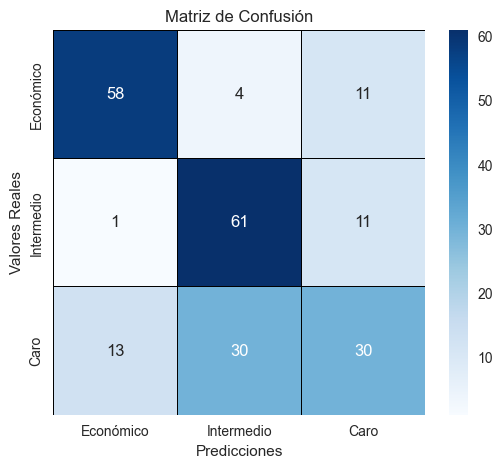

In [27]:
etiquetas = ["Económico", "Intermedio", "Caro"] 

cm = confusion_matrix(test_salePrice, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black',
            xticklabels=etiquetas, yticklabels=etiquetas)

plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()


Al igual que en todos los modelos hechos, en la clase donde peor clasifico fue en caro teniendo un total de 43 clasificaciones incorrectas. Cabe recalcar que de esta clase representa la menor cantidad de datos existentes en el dataset, aunque se haya hecho una separacion estratificada, sigue siendo una menor cantidad de datos en comparacion a los demas. El modelo interpreto mas de clase cara como intermedia. En cuanto a las demas clases, el modelo se adapto de muy buena forma a los datos ingresos siendo la mejor clasificacion las casas de valor intermedio, seguido de la clase economica.